# Frozen Lake with Branch and Bound

In [ ]:
import numpy as np
def problem_generation(no_of_obstacles,m,n):
  l=[]
  for i in range(no_of_obstacles):
    t=(np.random.randint(0,m-1),np.random.randint(0,n-1))
    if t not in l:
      l.append(t)
  return l
problem_generation(7,10,10)

[(5, 2), (2, 8), (6, 3), (2, 4), (8, 5), (7, 2)]

In [ ]:
import numpy as np
from collections import deque
from PIL import Image, ImageDraw, ImageFont
import os
import time
class frozen_lake:
    def __init__(self, m, n, location=[0, 0], goal=[-1, -1], obstacles=None):
        self.a = np.char.array(np.zeros((m, n), dtype=int).astype(str))
        self.location = location
        self.a[self.location[0], self.location[1]] = "+"
        self.n = n
        self.m = m
        self.goal = goal


        if obstacles:
            for obs in obstacles:
                self.a[obs[0], obs[1]] = "X"


        self.a[self.goal[0], self.goal[1]] = "G"


        if not os.path.exists("frames"):
            os.makedirs("frames")

    def move_left(self):
        if self.location[1] > 0:
            self.location[1] -= 1
            self.agent()
        else:
            print("can't go left further")

    def move_right(self):
        if self.location[1] < self.n - 1:
            self.location[1] += 1
            self.agent()
        else:
            print("can't go right further")

    def move_up(self):
        if self.location[0] > 0:
            self.location[0] -= 1
            self.agent()
        else:
            print("can't go up further")

    def move_down(self):
        if self.location[0] < self.m - 1:
            self.location[0] += 1
            self.agent()
        else:
            print("can't go down further")

    def agent(self):
        self.reset()
        self.a[self.location[0], self.location[1]] = "+"

    def show(self, frame_number):

        cell_size = 50
        width = self.n * cell_size
        height = self.m * cell_size
        img = Image.new('RGB', (width, height), color='white')
        draw = ImageDraw.Draw(img)


        colors = {
            "0": (255, 255, 255),
            "X": (255, 0, 0),
            "+": (0, 255, 0),
            "G": (0, 0, 255)
        }


        for i in range(self.m):
            for j in range(self.n):
                color = colors[self.a[i, j]]
                x0 = j * cell_size
                y0 = i * cell_size
                x1 = x0 + cell_size
                y1 = y0 + cell_size
                draw.rectangle([x0, y0, x1, y1], fill=color)


        for i in range(self.m + 1):

            draw.line((0, i * cell_size, width, i * cell_size), fill=(0, 0, 0), width=2)
        for j in range(self.n + 1):

            draw.line((j * cell_size, 0, j * cell_size, height), fill=(0, 0, 0), width=2)


        agent_x = self.location[1] * cell_size + cell_size // 2
        agent_y = self.location[0] * cell_size + cell_size // 2
        agent_radius = cell_size // 4
        draw.ellipse([agent_x - agent_radius, agent_y - agent_radius, agent_x + agent_radius, agent_y + agent_radius], fill=(0, 255, 0))


        img.save(f"frames/frame_{frame_number}.png")

    def reset(self):
        for i in range(self.m):
            for j in range(self.n):
                if self.a[i, j] != "X" and self.a[i, j] != "G":
                    self.a[i, j] = "0"

class node(frozen_lake):
    def __init__(self, m, n, x_crnt, y_crnt, x_goal, y_goal, obstacles=None):
        super().__init__(m, n, location=[x_crnt, y_crnt], goal=[x_goal, y_goal], obstacles=obstacles)
        self.x_crnt = x_crnt
        self.y_crnt = y_crnt
        self.x_goal = x_goal
        self.y_goal = y_goal
        self.m = m
        self.n = n
        self.directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    def manhattan_distance(self, x_crnt, y_crnt):
        return abs(x_crnt - self.x_goal) + abs(y_crnt - self.y_goal)

    def branch_and_bound(self):

        queue = deque([(0 + self.manhattan_distance(self.x_crnt, self.y_crnt), 0, self.x_crnt, self.y_crnt, [])])
        visited = set()

        best_cost = float('inf')
        best_path = []

        while queue:
            cost, g, x, y, path = queue.popleft()

            if (x, y) == (self.x_goal, self.y_goal):
                if cost < best_cost:
                    best_cost = cost
                    best_path = path + [(x, y)]
                continue

            if (x, y) in visited:
                continue

            visited.add((x, y))


            for dx, dy in self.directions:
                nx, ny = x + dx, y + dy
                if 0 <= nx < self.m and 0 <= ny < self.n and (nx, ny) not in visited:

                    if self.a[nx, ny] == "X":
                        continue

                    new_g = g + 1
                    new_cost = new_g + self.manhattan_distance(nx, ny)
                    queue.append((new_cost, new_g, nx, ny, path + [(x, y)]))

        return best_path

    def follow_path(self, path):
        frame_number = 0
        for (x, y) in path:
            self.location = [x, y]
            self.agent()
            self.show(frame_number)
            frame_number += 1


        self.create_gif()

    def create_gif(self):

        image_files = [f"frames/frame_{i}.png" for i in range(len(os.listdir('frames')))]
        images = [Image.open(img) for img in image_files]


        images[0].save(f"frozen_lake_{time.time()}.gif", save_all=True, append_images=images[1:], duration=500, loop=0)
        for img in image_files:
            os.remove(img)

        print("GIF created")



o1=problem_generation(10,10,10)
o2=problem_generation(10,10,10)
o3=problem_generation(10,10,10)
o4=problem_generation(10,10,10)
o5=problem_generation(10,10,10)

obstacles=[o1,o2,o3,o4,o5]
frozen_lake_time=[]
for i in range(5):
  ts=time.time()
  x = node(10, 10, 0, 0,9, 9, obstacles=obstacles[i])
  path = x.branch_and_bound()
  if path:
      print("Path found:", path)
      x.follow_path(path)
  else:
      print("No path found.")
  te=time.time()
  frozen_lake_time.append(te-ts)

Path found: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]
GIF created
Path found: [(0, 0), (1, 0), (2, 0), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]
GIF created
Path found: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]
GIF created
Path found: [(0, 0), (1, 0), (1, 1), (1, 2), (1, 3), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3), (7, 3), (7, 4), (8, 4), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]
GIF created
Path found: [(0, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (6, 2), (7, 2), (8, 2), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]
GIF created


In [ ]:
print(frozen_lake_time)
print("average_time_frozen_lake= ", sum(frozen_lake_time)/len(frozen_lake_time))
average_time_frozen_lake=sum(frozen_lake_time)/len(frozen_lake_time)

[0.811953067779541, 0.8022329807281494, 0.7898645401000977, 0.8104987144470215, 1.1731088161468506]
average_time_frozen_lake=  0.877531623840332


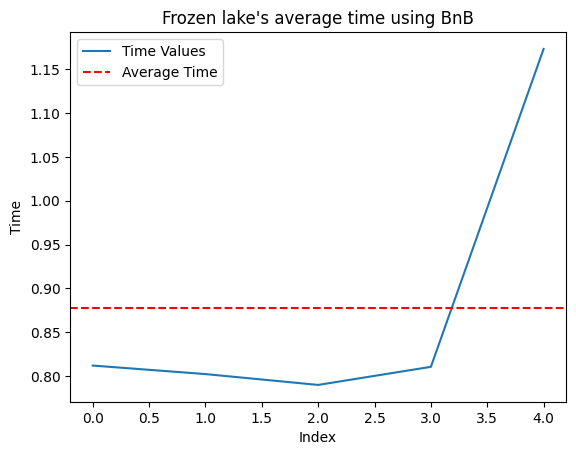

In [ ]:
import matplotlib.pyplot as plt
plt.plot(frozen_lake_time, label='Time Values')
plt.axhline(average_time_frozen_lake, color='r', linestyle='--', label='Average Time')
plt.title("Frozen lake's average time using BnB")
plt.xlabel('Index')
plt.ylabel('Time')
plt.legend()
plt.show()

# Frozen Lake with IDA

In [ ]:
"Frozen lake with IDA* and GIf "
import numpy as np
from collections import deque
from PIL import Image, ImageDraw, ImageFont
import os
count=0
class frozen_lake:
    def __init__(self, m, n, location=[0, 0], goal=[-1, -1], obstacles=None):
        self.a = np.char.array(np.zeros((m, n), dtype=int).astype(str))
        self.location = location
        self.a[self.location[0], self.location[1]] = "+"
        self.n = n
        self.m = m
        self.goal = goal

        if obstacles:
            for obs in obstacles:
                self.a[obs[0], obs[1]] = "X"

        self.a[self.goal[0], self.goal[1]] = "G"


        if not os.path.exists("frames"):
            os.makedirs("frames")

    def move_left(self):
        if self.location[1] > 0:
            self.location[1] -= 1
            self.agent()
        else:
            print("can't go left further")

    def move_right(self):
        if self.location[1] < self.n - 1:
            self.location[1] += 1
            self.agent()
        else:
            print("can't go right further")

    def move_up(self):
        if self.location[0] > 0:
            self.location[0] -= 1
            self.agent()
        else:
            print("can't go up further")

    def move_down(self):
        if self.location[0] < self.m - 1:
            self.location[0] += 1
            self.agent()
        else:
            print("can't go down further")

    def agent(self):
        self.reset()
        self.a[self.location[0], self.location[1]] = "+"

    def show(self, frame_number):

        cell_size = 50
        width = self.n * cell_size
        height = self.m * cell_size
        img = Image.new('RGB', (width, height), color='white')
        draw = ImageDraw.Draw(img)

        colors = {
            "0": (255, 255, 255),
            "X": (255, 0, 0),
            "+": (0, 255, 0),
            "G": (0, 0, 255)
        }


        for i in range(self.m):
            for j in range(self.n):
                color = colors[self.a[i, j]]
                x0 = j * cell_size
                y0 = i * cell_size
                x1 = x0 + cell_size
                y1 = y0 + cell_size
                draw.rectangle([x0, y0, x1, y1], fill=color)


        for i in range(self.m + 1):

            draw.line((0, i * cell_size, width, i * cell_size), fill=(0, 0, 0), width=2)
        for j in range(self.n + 1):

            draw.line((j * cell_size, 0, j * cell_size, height), fill=(0, 0, 0), width=2)


        agent_x = self.location[1] * cell_size + cell_size // 2
        agent_y = self.location[0] * cell_size + cell_size // 2
        agent_radius = cell_size // 4
        draw.ellipse([agent_x - agent_radius, agent_y - agent_radius, agent_x + agent_radius, agent_y + agent_radius], fill=(0, 255, 0))


        img.save(f"frames/frame_{frame_number}.png")

    def reset(self):
        for i in range(self.m):
            for j in range(self.n):
                if self.a[i, j] != "X" and self.a[i, j] != "G":
                    self.a[i, j] = "0"

class node(frozen_lake):
    def __init__(self, m, n, x_crnt, y_crnt, x_goal, y_goal, obstacles=None):
        super().__init__(m, n, location=[x_crnt, y_crnt], goal=[x_goal, y_goal], obstacles=obstacles)
        self.x_crnt = x_crnt
        self.y_crnt = y_crnt
        self.x_goal = x_goal
        self.y_goal = y_goal
        self.m = m
        self.n = n
        self.directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    def manhattan_distance(self, x_crnt, y_crnt):
        return abs(x_crnt - self.x_goal) + abs(y_crnt - self.y_goal)

    def ida_star(self):

        bound = self.manhattan_distance(self.x_crnt, self.y_crnt)
        path = [(self.x_crnt, self.y_crnt)]
        while True:
            t = self.ida_star_search(path, 0, bound)
            if t == 'found':
                return path
            elif t == float('inf'):
                return None
            bound = t

    def ida_star_search(self, path, g, bound):

        x, y = path[-1]
        f = g + self.manhattan_distance(x, y)


        if f > bound:
            return f


        if (x, y) == (self.x_goal, self.y_goal):
            return 'found'

        min_cost = float('inf')
        for dx, dy in self.directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < self.m and 0 <= ny < self.n and self.a[nx, ny] != "X" and (nx, ny) not in path:
                path.append((nx, ny))
                t = self.ida_star_search(path, g + 1, bound)
                if t == 'found':
                    return 'found'
                if t < min_cost:
                    min_cost = t
                path.pop()

        return min_cost

    def follow_path(self, path):
        frame_number = 0
        for (x, y) in path:
            self.location = [x, y]
            self.agent()
            self.show(frame_number)
            frame_number += 1


        self.create_gif()

    def create_gif(self):

        image_files = [f"frames/frame_{i}.png" for i in range(len(os.listdir('frames')))]
        images = [Image.open(img) for img in image_files]

        images[0].save(f"frozen_lake_ida*{count}.gif", save_all=True, append_images=images[1:], duration=500, loop=0)
        for img in image_files:
            os.remove(img)

        print("GIF created")



o1=problem_generation(10,10,10)
o2=problem_generation(10,10,10)
o3=problem_generation(10,10,10)
o4=problem_generation(10,10,10)
o5=problem_generation(10,10,10)

obstacles=[o1,o2,o3,o4,o5]
frozen_lake_time=[]
for i in range(5):
  ts=time.time()
  x = node(10, 10, 0, 0,9, 9, obstacles=obstacles[i])
  path = x.ida_star()
  if path:
      print("Path found:", path)
      x.follow_path(path)
  else:
      print("No path found.")
  te=time.time()
  frozen_lake_time.append(te-ts)
  count+=1


Path found: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]
GIF created
Path found: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]
GIF created
Path found: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]
GIF created
Path found: [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (4, 1), (5, 1), (6, 1), (6, 2), (7, 2), (8, 2), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]
GIF created
Path found: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]
GIF created


In [ ]:
print(frozen_lake_time)
print("average_time_frozen_lake= ", sum(frozen_lake_time)/len(frozen_lake_time))
average_time_frozen_lake=sum(frozen_lake_time)/len(frozen_lake_time)

[0.8035855293273926, 0.895097017288208, 0.801628589630127, 0.8039257526397705, 0.7951474189758301]
average_time_frozen_lake=  0.8198768615722656


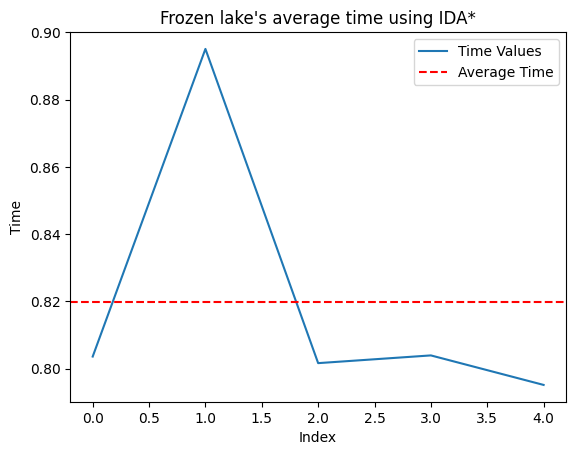

In [ ]:
import matplotlib.pyplot as plt
plt.plot(frozen_lake_time, label='Time Values')
plt.axhline(average_time_frozen_lake, color='r', linestyle='--', label='Average Time')
plt.title("Frozen lake's average time using IDA*")
plt.xlabel('Index')
plt.ylabel('Time')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from collections import deque
from PIL import Image, ImageDraw, ImageFont
import os
import time


class PerformanceRecorder:
    def __init__(self):
        self.results = []

    def record(self, algorithm_name, reward, time_taken, convergence_point):
        self.results.append({
            'Algorithm': algorithm_name,
            'Reward': reward,
            'Time Taken (s)': time_taken,
            'Convergence Point': convergence_point
        })

    def display_results(self):
        print("Performance Results:")
        for result in self.results:
            print(f"Algorithm: {result['Algorithm']}")
            print(f"  Reward (Steps): {result['Reward']}")
            print(f"  Time Taken (s): {result['Time Taken (s)']}")
            print(f"  Point of Convergence: {result['Convergence Point']}")
            print("-" * 40)

class node(frozen_lake):
    def __init__(self, m, n, x_crnt, y_crnt, x_goal, y_goal, obstacles=None):
        super().__init__(m, n, location=[x_crnt, y_crnt], goal=[x_goal, y_goal], obstacles=obstacles)
        self.x_crnt = x_crnt
        self.y_crnt = y_crnt
        self.x_goal = x_goal
        self.y_goal = y_goal
        self.m = m
        self.n = n
        self.directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    def manhattan_distance(self, x_crnt, y_crnt):
        return abs(x_crnt - self.x_goal) + abs(y_crnt - self.y_goal)

    def branch_and_bound(self):

        ...

    def ID_Astar(self):

        ...

    def a_star(self):

        open_list = [(self.x_crnt, self.y_crnt)]
        g_cost = { (self.x_crnt, self.y_crnt): 0 }
        f_cost = { (self.x_crnt, self.y_crnt): self.manhattan_distance(self.x_crnt, self.y_crnt) }
        came_from = {}
        visited = set()

        while open_list:
            current = min(open_list, key=lambda x: f_cost[x])
            open_list.remove(current)
            x, y = current

            if (x, y) == (self.x_goal, self.y_goal):

                path = []
                while current in came_from:
                    path.append(current)
                    current = came_from[current]
                path.reverse()
                return path

            visited.add(current)

            for dx, dy in self.directions:
                nx, ny = x + dx, y + dy
                if 0 <= nx < self.m and 0 <= ny < self.n and (nx, ny) not in visited and self.a[nx, ny] != "X":
                    tentative_g = g_cost[(x, y)] + 1
                    if (nx, ny) not in g_cost or tentative_g < g_cost[(nx, ny)]:
                        came_from[(nx, ny)] = (x, y)
                        g_cost[(nx, ny)] = tentative_g
                        f_cost[(nx, ny)] = tentative_g + self.manhattan_distance(nx, ny)
                        open_list.append((nx, ny))

        return None

    def follow_path(self, path):
        frame_number = 0
        for (x, y) in path:
            self.location = [x, y]
            self.agent()
            self.show(frame_number)
            frame_number += 1


        self.create_gif()

    def create_gif(self):

        image_files = [f"frames/frame_{i}.png" for i in range(len(os.listdir('frames')))]
        images = [Image.open(img) for img in image_files]

        images[0].save('frozen_lake_navigation.gif', save_all=True, append_images=images[1:], duration=500, loop=0)
        for img in image_files:
            os.remove(img)

        print("GIF created")

def test_algorithm(algorithm, environment, recorder):
    start_time = time.time()
    if algorithm == "Branch and Bound":
        path = environment.branch_and_bound()
    elif algorithm == "IDA*":
        path = environment.ID_Astar()
    elif algorithm == "A*":
        path = environment.a_star()

    end_time = time.time()
    time_taken = end_time - start_time
    if path:
        reward = len(path)
        convergence_point = path[-1]
        recorder.record(algorithm, reward, time_taken, convergence_point)
        print(f"{algorithm} found a path: {path}")
    else:
        recorder.record(algorithm, None, time_taken, None)
        print(f"{algorithm} did not find a path.")

obstacles = [(0, 2), (3, 2), (4, 3),(1,5),(9,3),(7,5)]
env = node(10, 10, 0, 0, 7, 9, obstacles=obstacles)
recorder = PerformanceRecorder()


test_algorithm("Branch and Bound", env, recorder)
test_algorithm("IDA*", env, recorder)
test_algorithm("A*", env, recorder)


recorder.display_results()


Branch and Bound did not find a path.
IDA* did not find a path.
A* found a path: [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (7, 6), (7, 7), (7, 8), (7, 9)]
Performance Results:
Algorithm: Branch and Bound
  Reward (Steps): None
  Time Taken (s): 1.6689300537109375e-06
  Point of Convergence: None
----------------------------------------
Algorithm: IDA*
  Reward (Steps): None
  Time Taken (s): 2.1457672119140625e-06
  Point of Convergence: None
----------------------------------------
Algorithm: A*
  Reward (Steps): 16
  Time Taken (s): 0.000682830810546875
  Point of Convergence: (7, 9)
----------------------------------------
